Mean Squared Error: 62.20422422901778


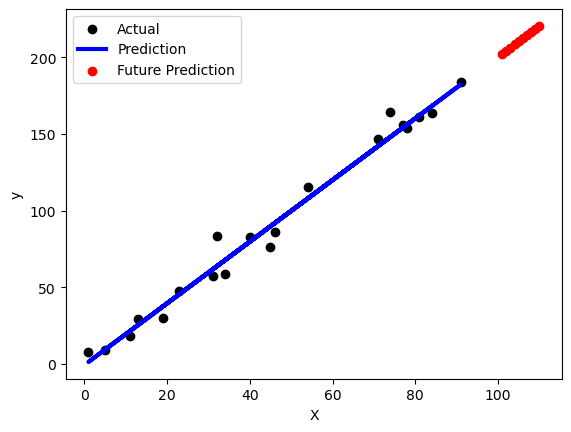

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 예제로 사용할 시계열 데이터 생성
np.random.seed(42)
X = np.arange(1, 101, 1)
y = 2 * X + 1 + np.random.normal(scale=10, size=len(X))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
X_train = X_train.reshape(-1, 1)
model.fit(X_train, y_train)

# 예측
X_test = X_test.reshape(-1, 1)
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 다음 값 10개 예측
future_values = np.arange(101, 111, 1).reshape(-1, 1)
future_pred = model.predict(future_values)

# 시각화
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Prediction')
plt.scatter(future_values, future_pred, color='red', label='Future Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


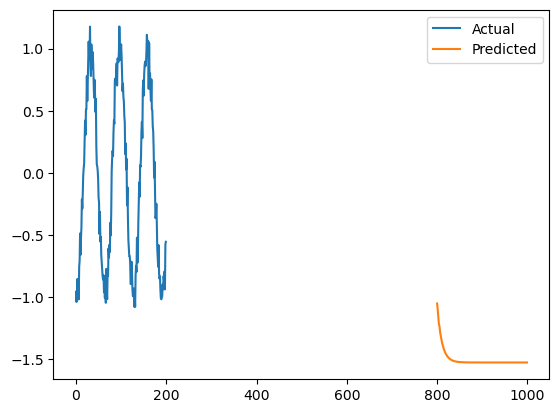

Mean Squared Error: 2.6725076874121503


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 시계열 데이터 생성
t = np.arange(0, 100, 0.1)
y = np.sin(t) + 0.1 * np.random.randn(len(t))

# 데이터 프레임 생성
df = pd.DataFrame({'y': y})

# 훈련 및 테스트 데이터 분리
split = int(0.8 * len(df))
train, test = df[:split], df[split:]

# ARIMA 모델 학습
model = ARIMA(train, order=(5,1,0))  # ARIMA(p,d,q)의 형태, 차수는 데이터에 따라 적절히 조절
fit_model = model.fit()

# 테스트 데이터 예측
start = len(train)
end = len(train) + len(test) - 1
y_pred = fit_model.predict(start=start, end=end, typ='levels')

# 실제 값과 예측 값 시각화
plt.plot(test['y'].values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# 평가 지표 출력 (예: 평균 제곱 오차)
mse = mean_squared_error(test['y'].values, y_pred)
print(f'Mean Squared Error: {mse}')